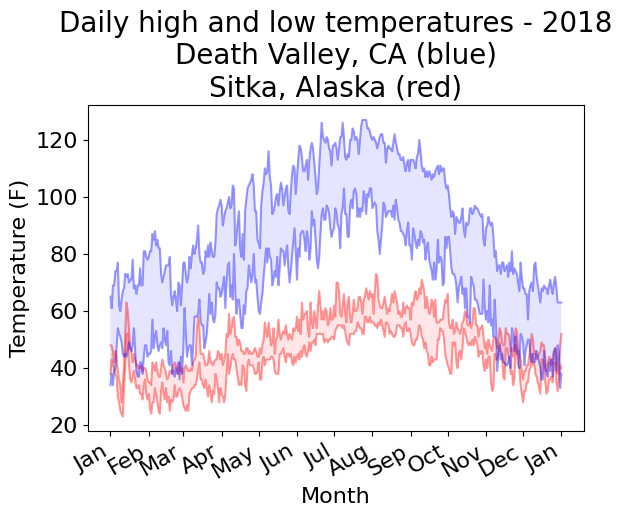

In [3]:
import csv
import collections
from datetime import datetime

from matplotlib import pyplot as plt
import matplotlib.dates as mdates


def get_data(filename: str) -> dict:
    with open(filename) as f:
        reader = csv.DictReader(f)
        data = collections.defaultdict(list)
        for row in reader:
            for key, value in row.items():
                data[key].append(value)
    return data


def comp(d1: dict, d2: dict, title):
    l = r = 0
    while (
        l != len(d1["DATE"])
        and r != len(d2["DATE"])
        and (l_date := datetime.strptime(d1["DATE"][l], "%Y-%m-%d"))
        != (r_date := datetime.strptime(d2["DATE"][r], "%Y-%m-%d"))
    ):
        if l_date < r_date:
            l += 1
        else:
            r += 1

    upper_bound: int = min(len(d1["DATE"]), len(d2["DATE"]))
    dates = [datetime.strptime(el, "%Y-%m-%d") for el in d1["DATE"][l:upper_bound]]
    d1_tmin = [int(el) for el in d1["TMIN"][l:upper_bound]]
    d1_tmax = [int(el) for el in d1["TMAX"][l:upper_bound]]
    d2_tmin = [int(el) for el in d2["TMIN"][r:upper_bound]]
    d2_tmax = [int(el) for el in d2["TMAX"][r:upper_bound]]

    fig, ax = plt.subplots()
    ax.plot(dates, d1_tmin, c="red", alpha=0.4)
    ax.plot(dates, d1_tmax, c="red", alpha=0.4)
    ax.plot(dates, d2_tmin, c="blue", alpha=0.4)
    ax.plot(dates, d2_tmax, c="blue", alpha=0.4)

    plt.fill_between(dates, d1_tmax, d1_tmin, facecolor="red", alpha=0.1)
    plt.fill_between(dates, d2_tmax, d2_tmin, facecolor="blue", alpha=0.1)

    plt.title(title, fontsize=20)
    plt.xlabel("Month", fontsize=16)
    fig.autofmt_xdate()
    plt.ylabel("Temperature (F)", fontsize=16)
    plt.tick_params(axis="both", which="major", labelsize=16)

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

    plt.show()


sitka = get_data("data/sitka_weather_2018_full.csv")
d_valley = get_data("data/death_valley_2018_full.csv")
comp(sitka, d_valley, "Daily high and low temperatures - 2018\nDeath Valley, CA (blue)\nSitka, Alaska (red)")